# <center>Heart Disease Detection</center>

## Overview:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Dataset Information:

[Cleveland + Hungarian + Switzerland + Long Beach VA + Stalog] - [Kaggle - Heart Disease Detection](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


### Independent Feature:
* HeartDisease: output class [1: heart disease, 0: Normal]

### Dependent Feature:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

### Training : Testing :: 820 : 205 :: 80 : 20

### Evaluation Metrics Considered:
* Accuracy, Precision, Recision, F1 Score, ROC AUC Curve

# 1. Importing required Libraries
* NumPy: For numerical computations and array manipulation.
* Pandas: For data manipulation and analysis.
* Seaborn: For statistical data visualization.
* Matplotlib: For creating plots and visualizations.
* Scikit-learn: For machine learning algorithms and evaluation metrics.
* XGBoost: For Extreme gradient boosting machine learning.
* Catboost: For CatBoosting machine learning. 

In [25]:
import warnings
warnings.simplefilter('ignore')

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# 2. Data Ingestion

In [2]:
data = pd.read_csv('Data/heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 3. Data Exploration

In [4]:
data.shape

(1025, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# 4. Data Preprocessing

### 4.1 Feature Classification

In [9]:
categorical_columns = []
numerical_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [10]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Categorical Features:  []


In [11]:
discrete_features=[feature for feature in numerical_columns if len(data[feature].unique())<25]
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]

### 4.2 Training and Testing Data Preparation

In [13]:
x = data.drop('target',axis=1)

y = data["target"]

In [14]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 20)

In [32]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1025, 13)
(820, 13)
(205, 13)
(1025,)
(820,)
(205,)


### 4.3 Feature Scaling

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

# 5. Modelling

### 5.1 Model Training

In [27]:
models={
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Random Forest Classfier':RandomForestClassifier(),
    'XG Boost':XGBClassifier(),
    'K Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine':SVC(probability=True)
}

In [28]:
model_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Training Accuracy: ",train_accuracy)
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)


    model_list.append(model_name)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)

max_accuracy_index = test_accuracy_list.index(max(test_accuracy_list))
print(f"\nThe best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {test_accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy:  0.8621951219512195
Testing Accuracy:  0.7951219512195122
Precision:  0.7622950819672131
Recall:  0.8773584905660378
F1 Score:  0.8157894736842105
Model: Naive Bayes
Training Accuracy:  0.8304878048780487
Testing Accuracy:  0.8
Precision:  0.782608695652174
Recall:  0.8490566037735849
F1 Score:  0.8144796380090498
Model: Random Forest Classfier
Training Accuracy:  1.0
Testing Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Model: XG Boost
Training Accuracy:  1.0
Testing Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Model: K Nearest Neighbors
Training Accuracy:  0.9548780487804878
Testing Accuracy:  0.848780487804878
Precision:  0.8571428571428571
Recall:  0.8490566037735849
F1 Score:  0.8530805687203792
Model: Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Model: Support Vector Machine
Training Accuracy:  0.9353658536585366
Testing Accuracy:  0.921951219512195

In [29]:
results = {
    'Model': model_list,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
}

results = pd.DataFrame(results)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.862195,0.795122,0.762295,0.877358,0.815789
1,Naive Bayes,0.830488,0.800000,0.782609,0.849057,0.814480
2,Random Forest Classfier,1.000000,1.000000,1.000000,1.000000,1.000000
3,XG Boost,1.000000,1.000000,1.000000,1.000000,1.000000
4,K Nearest Neighbors,0.954878,0.848780,0.857143,0.849057,0.853081
5,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
6,Support Vector Machine,0.935366,0.921951,0.881356,0.981132,0.928571


### ROC AUC Curve Representation

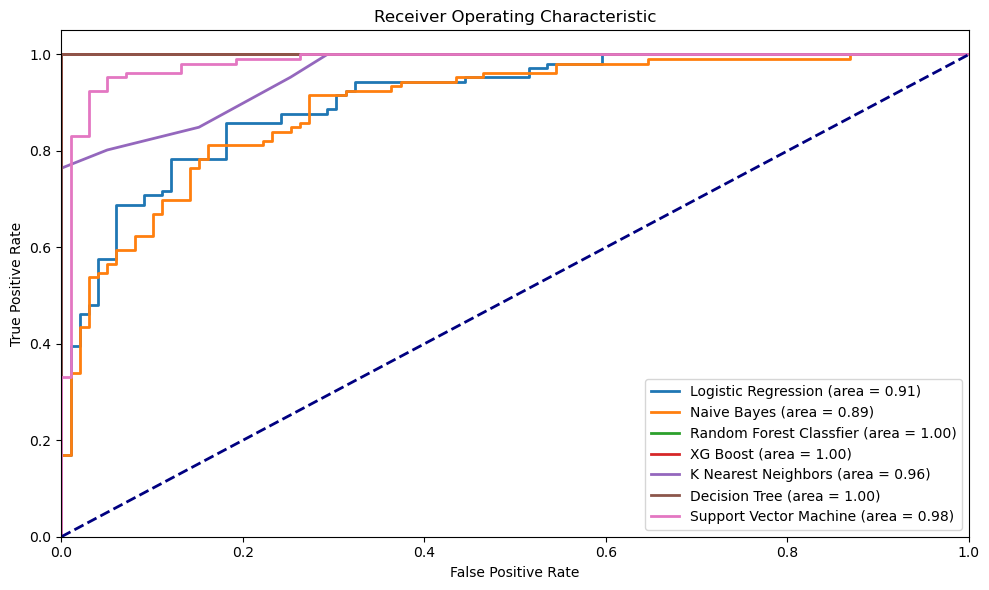

In [30]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))


fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    plot_roc_curve(ax, y_test, y_score, model_name)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [23]:
best_model = models['Random Forest Classfier']
pickle.dump(best_model,open('Heart_Model.pkl','wb'))
pickle.dump(scaler,open('Heart_Preprocessor.pkl','wb'))

# 6. Model File Testing

In [31]:
import pickle

model = pickle.load(open("../Artifacts/Heart_Disease/Heart_Model.pkl", "rb"))
processor = pickle.load(open("../Artifacts/Heart_Disease/Heart_Preprocessor.pkl", "rb"))

data = processor.transform([x_test[0]])
predictions = model.predict(data)

print(predictions)

[1]
